# Load the data

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

: 

# Data Exploration:

Conduct comprehensive EDA using visualization techniques to understand feature distributions and relationships with the target variable.

Reasoning: Generate descriptive statistics and examine data types to understand the dataset's structure and characteristics.

In [29]:
print(df.describe())
print(df.info())


                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000

# Reasoning: Visualize the distribution of the target variable 'Response' to understand the class imbalance and visualize the distributions of numerical and categorical features.



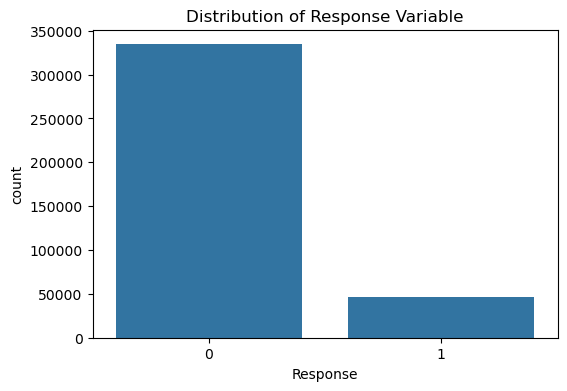

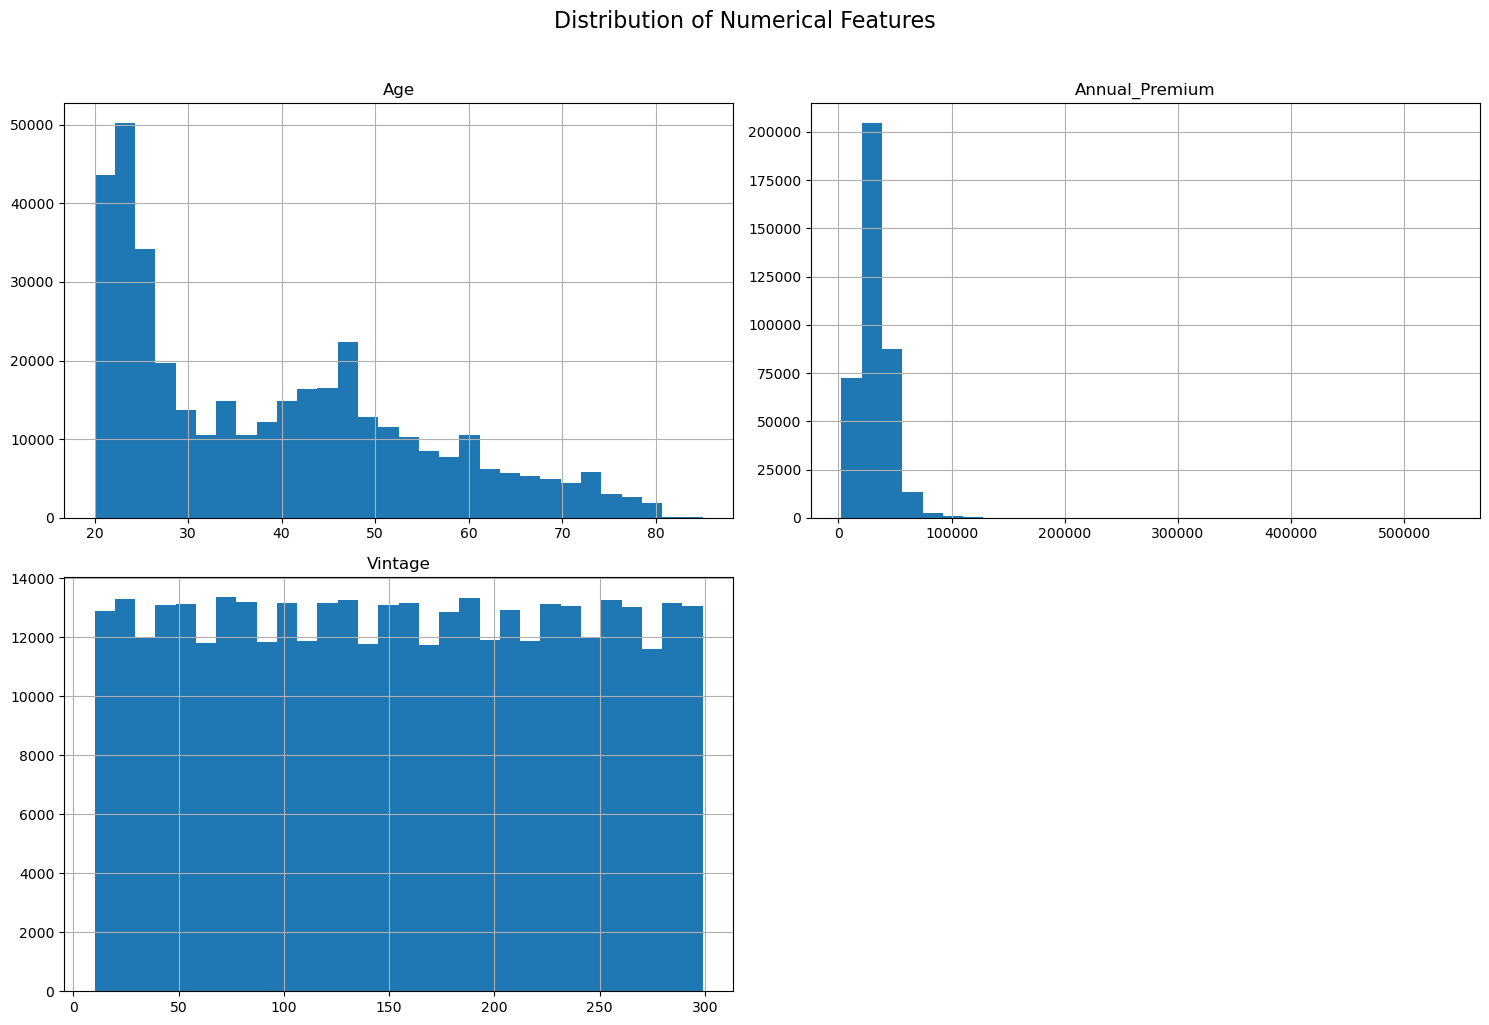

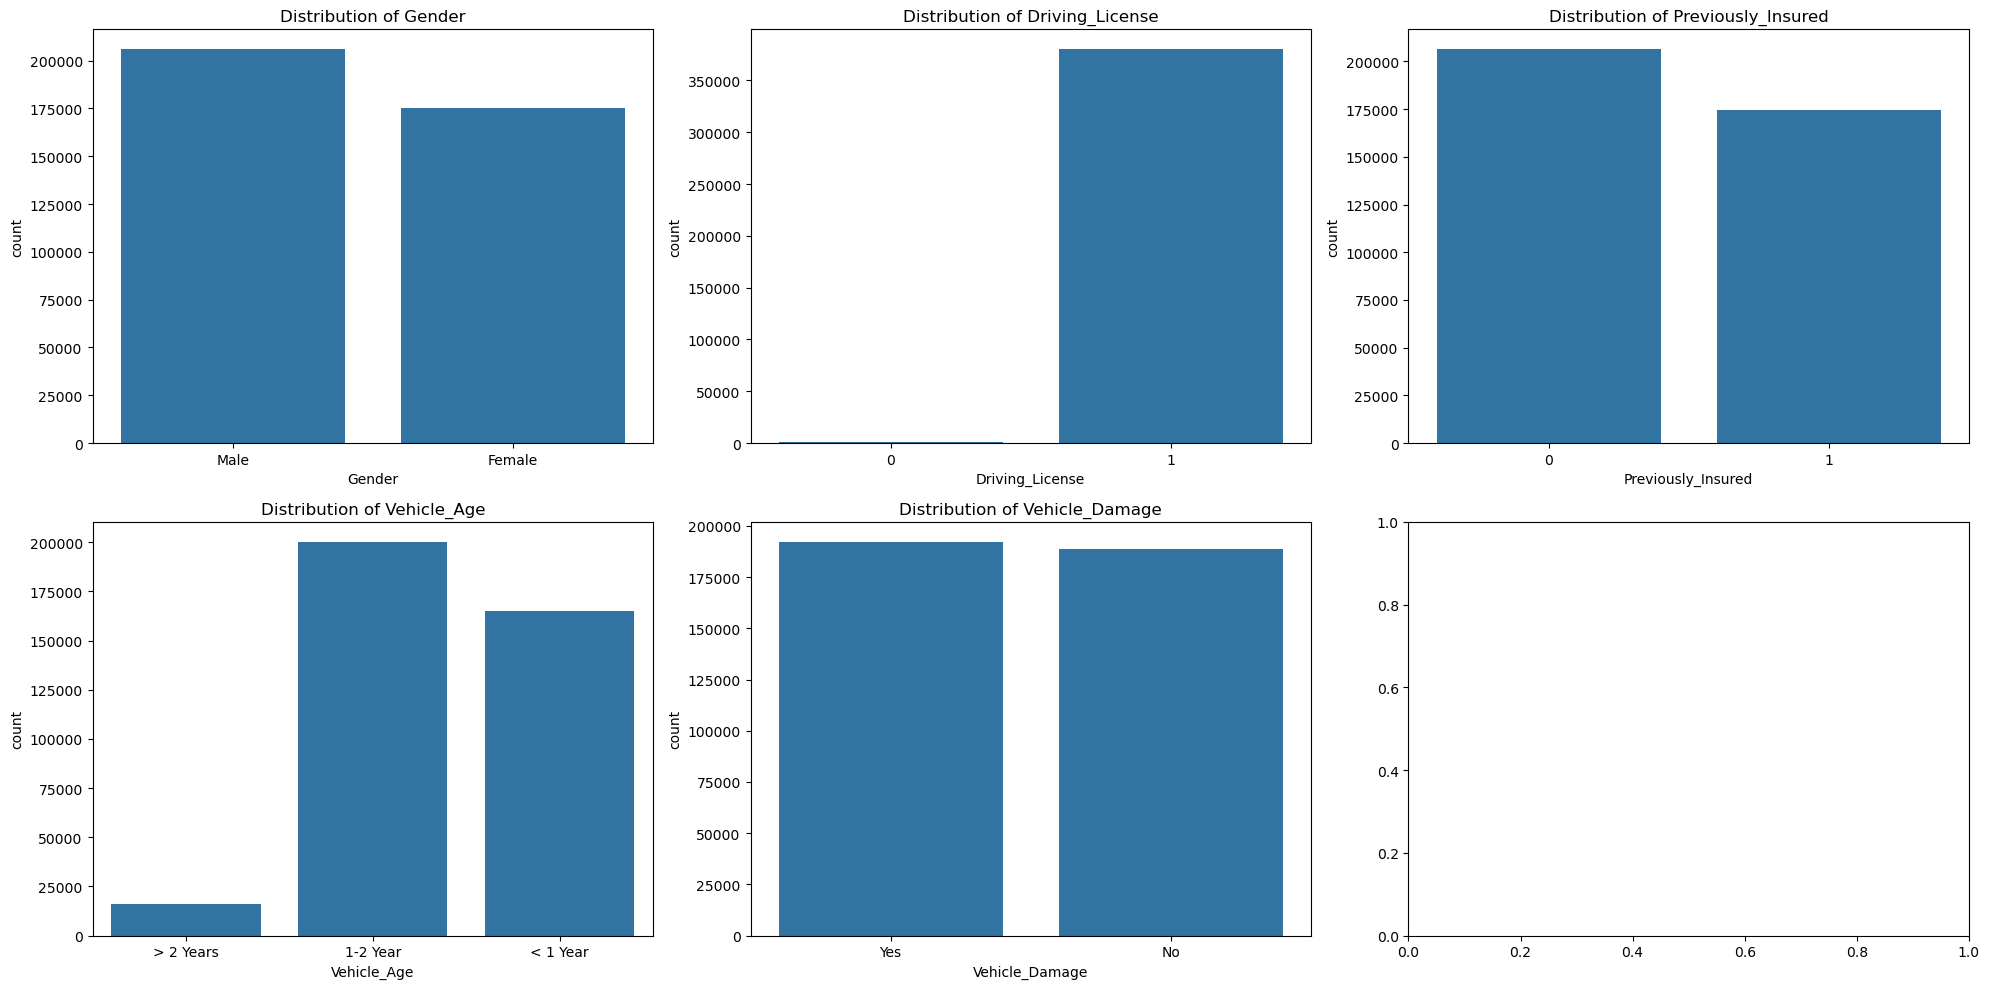

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df)
plt.title('Distribution of Response Variable')
plt.show()

numerical_features = ['Age', 'Annual_Premium', 'Vintage']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

categorical_features = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Reasoning: Explore the relationship between numerical features and the target variable using box plots and investigate the relationship between categorical features and the target variable using count plots.



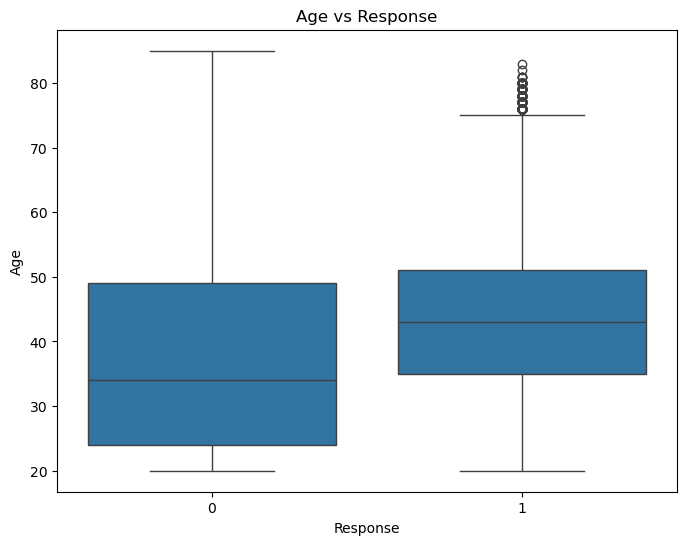

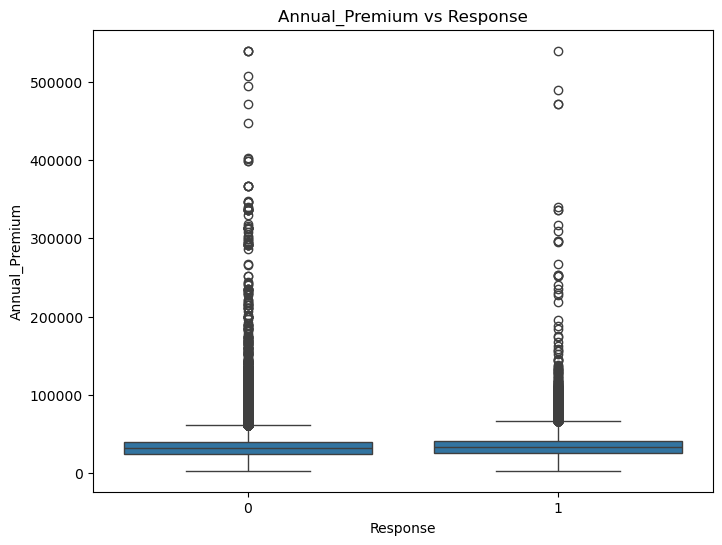

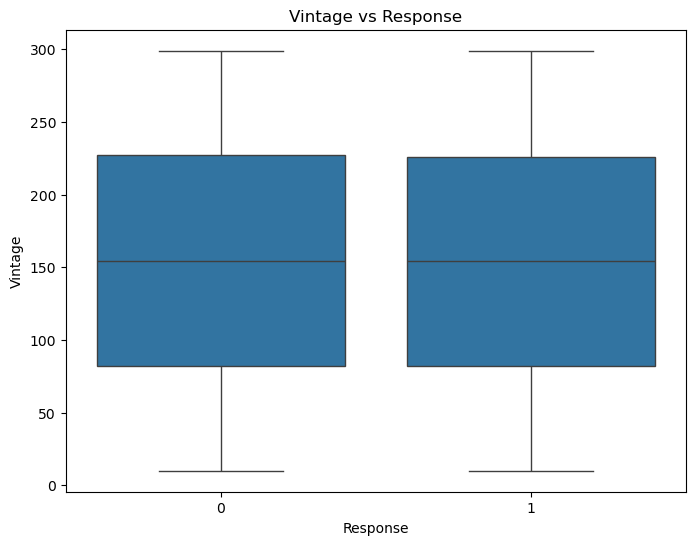

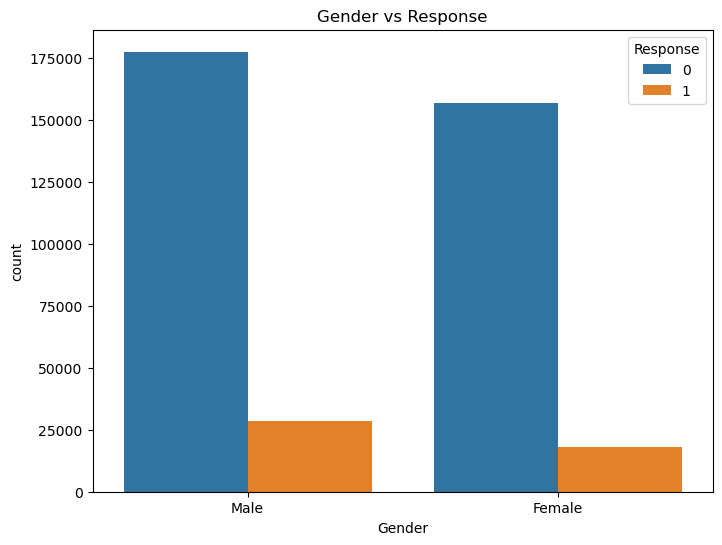

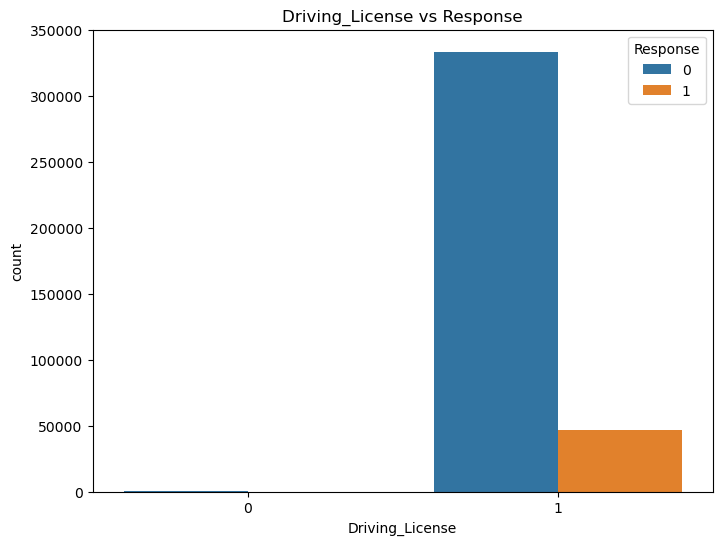

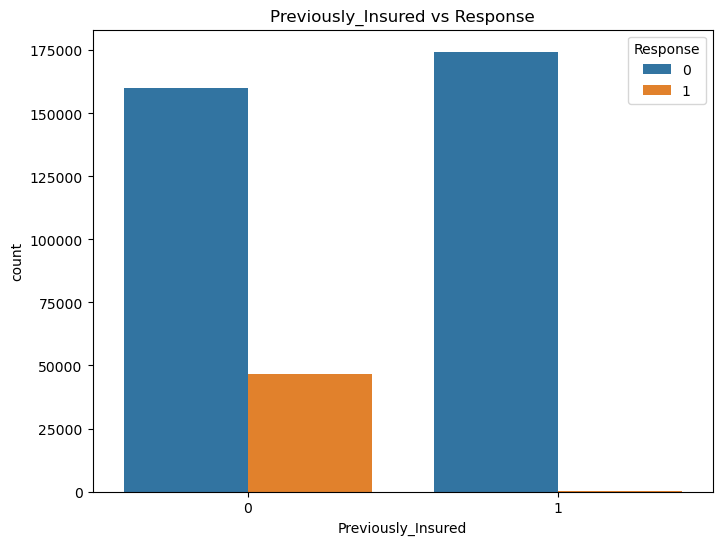

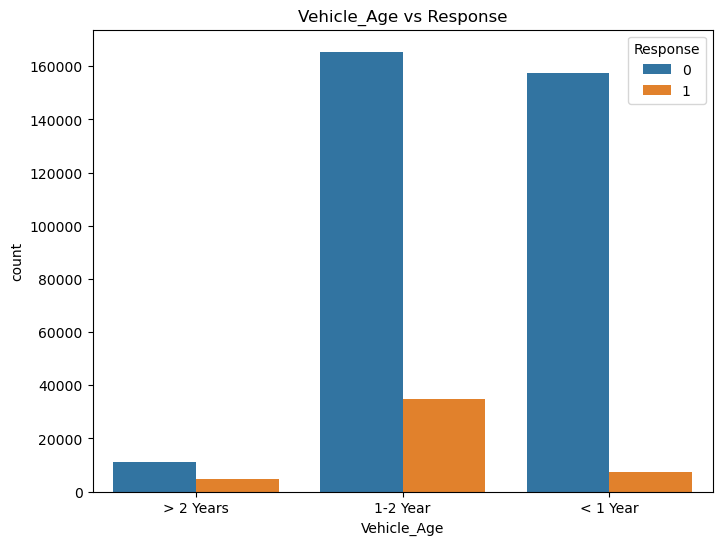

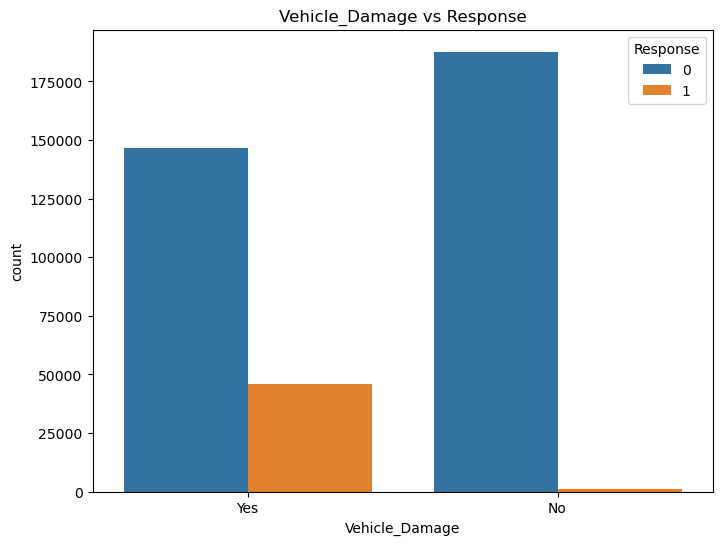

In [34]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Response', y=feature, data=df)
    plt.title(f'{feature} vs Response')
    plt.show()

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Response', data=df)
    plt.title(f'{feature} vs Response')
    plt.show()

# Reasoning: Compute and visualize the correlation matrix for numerical features to identify potential multicollinearity.

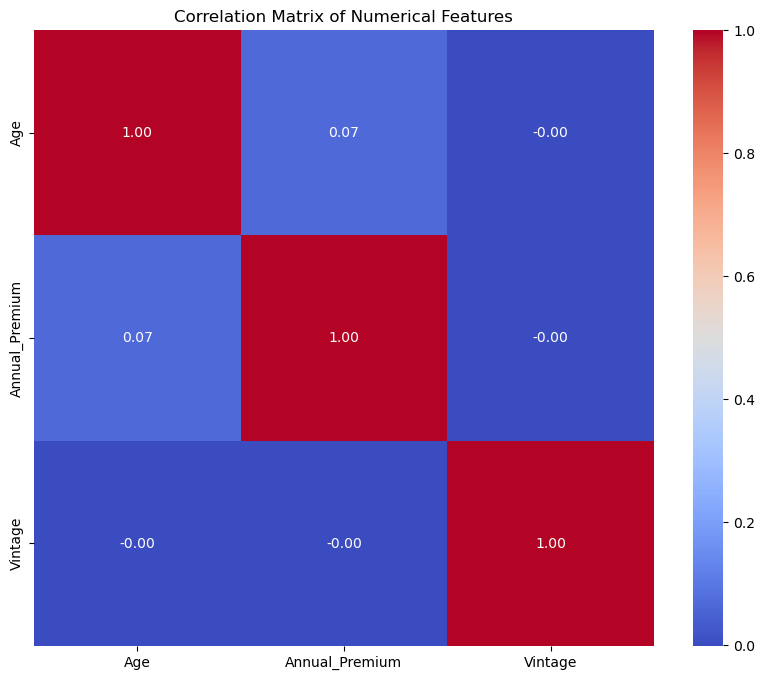

In [36]:
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Handle imbalanced data
Subtask:
Address the data imbalance issue using appropriate techniques like oversampling or undersampling.

In [40]:
# Assuming df is your original dataset
X = df.drop(columns=['Response'])  # Features
y = df['Response']                 # Target


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter



categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
numerical_features = ['Age', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Previously_Insured']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns like 'id'
)

X_processed = preprocessor.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print(f"Original dataset shape %s" % Counter(y))
print(f"Resampled dataset shape %s" % Counter(y_resampled))

# SMOTE outputs a numpy array, convert it back to a DataFrame
# We need to get the feature names after one-hot encoding
# This part is a bit tricky as ColumnTransformer doesn't directly provide feature names easily.
# A workaround is to manually construct the feature names or keep the processed data as a numpy array for modeling.
# For now, let's just verify the shapes and the target distribution

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


# Data preprocessing
Subtask:
Handle any missing values, encode categorical variables, and apply appropriate scaling techniques. Split the data into training and testing sets.

Reasoning: Identify columns with missing values and decide on an appropriate imputation strategy.

In [49]:
missing_values = df.isnull().sum()
print("Columns with missing values before imputation:")
print(missing_values[missing_values > 0])

Columns with missing values before imputation:
Series([], dtype: int64)


# Reasoning: There are no missing values in the dataframe based on the previous output, so I will proceed to identify and encode categorical features.

In [52]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical features:")
print(categorical_features)

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical features:")
print(numerical_features)

# Exclude 'id' and 'Response' from features for scaling and encoding
features_to_process = [col for col in df.columns if col not in ['id', 'Response']]

categorical_features_to_encode = [col for col in features_to_process if col in categorical_features]
numerical_features_to_scale = [col for col in features_to_process if col in numerical_features]

print("\nCategorical features to encode:")
print(categorical_features_to_encode)

print("\nNumerical features to scale:")
print(numerical_features_to_scale)

Categorical features:
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

Numerical features:
Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Categorical features to encode:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']

Numerical features to scale:
['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


# Reasoning: Apply one-hot encoding to the identified categorical features and standard scaling to the numerical features using a column transformer, then split the preprocessed data into training and testing sets.

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_to_scale),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_to_encode)
    ],
    remainder='passthrough' # Keep other columns like 'id' if needed, although they won't be used for training
)

# Separate features (X) and target (y)
X = df.drop(['Response', 'id'], axis=1)
y = df['Response']

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
# This is a bit complex with ColumnTransformer, but we can construct them manually
# For the numerical features, the names remain the same.
numerical_feature_names = numerical_features_to_scale
# For the one-hot encoded features, we need to get the categories from the encoder
categorical_transformer = preprocessor.named_transformers_['cat']
onehot_feature_names = categorical_transformer.get_feature_names_out(categorical_features_to_encode)
# Combine the feature names
all_feature_names = list(numerical_feature_names) + list(onehot_feature_names)

# Convert the processed data back to a DataFrame for easier handling (optional but good practice)
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (304887, 14)
Shape of X_test: (76222, 14)
Shape of y_train: (304887,)
Shape of y_test: (76222,)


# Feature engineering
Subtask:
Consider creating new features and analyze feature importance.

Reasoning: I will engineer a new feature by combining 'Age' and 'Vehicle_Age' and then analyze feature importance using a Random Forest model since it can provide feature importances.

In [59]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Engineer a new feature: interaction between Age and Vehicle_Age
# We need to revert X_processed_df back to a state where we can easily engineer features
# Let's go back to the original X before preprocessing and engineer the feature there
# Then re-apply the preprocessing steps.

# Let's reload the original X before preprocessing
X_original = df.drop(['Response', 'id'], axis=1)

# Engineer a new feature: Age group combined with Vehicle_Age
# Create age groups
X_original['Age_Group'] = pd.cut(X_original['Age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100'])

# Combine Age_Group and Vehicle_Age
X_original['Age_Vehicle_Interaction'] = X_original['Age_Group'].astype(str) + '_' + X_original['Vehicle_Age'].astype(str)

# Now, re-apply the preprocessing steps including the new feature
# Define the preprocessor again, including the new engineered feature
# We need to update the categorical and numerical features lists
categorical_features_to_encode_new = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Age_Group', 'Age_Vehicle_Interaction']
numerical_features_to_scale_new = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_to_scale_new),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_to_encode_new)
    ],
    remainder='passthrough'
)

# Apply preprocessing with the new feature
X_processed_new = preprocessor_new.fit_transform(X_original)

# Get feature names after preprocessing
numerical_feature_names_new = numerical_features_to_scale_new
categorical_transformer_new = preprocessor_new.named_transformers_['cat']
onehot_feature_names_new = categorical_transformer_new.get_feature_names_out(categorical_features_to_encode_new)
all_feature_names_new = list(numerical_feature_names_new) + list(onehot_feature_names_new)

# Convert to DataFrame
X_processed_df_new = pd.DataFrame(X_processed_new, columns=all_feature_names_new)

# Split data again with the new feature
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_processed_df_new, y, test_size=0.2, random_state=42, stratify=y)


# Train a Random Forest model to get feature importance
# Using a smaller number of estimators for faster execution
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train_new, y_train_new)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train_new.columns)

# Sort feature importances and print the top ones
print("Top 20 Feature Importances:")
print(feature_importances.sort_values(ascending=False).head(20))

# Based on feature importance, decide which features to keep.
# A common approach is to set a threshold or select a fixed number of top features.
# For this task, we will print the importances and proceed with all features for subsequent modeling steps,
# as feature selection based on importance is an iterative process and depends on model performance.

Top 20 Feature Importances:
Vintage                                   0.282495
Annual_Premium                            0.255186
Region_Code                               0.122826
Age                                       0.105820
Policy_Sales_Channel                      0.072765
Vehicle_Damage_Yes                        0.047363
Previously_Insured                        0.041005
Vehicle_Damage_No                         0.035456
Vehicle_Age_< 1 Year                      0.009211
Age_Group_26-50                           0.004562
Age_Vehicle_Interaction_26-50_1-2 Year    0.003460
Age_Group_0-25                            0.003401
Vehicle_Age_1-2 Year                      0.002618
Age_Vehicle_Interaction_0-25_< 1 Year     0.002531
Gender_Male                               0.001927
Gender_Female                             0.001783
Age_Group_51-75                           0.001497
Vehicle_Age_> 2 Years                     0.001153
Age_Vehicle_Interaction_51-75_1-2 Year    0.001151
Age

# Handle imbalanced data
Subtask:
Address the data imbalance issue using appropriate techniques like oversampling or undersampling.

Reasoning: Apply SMOTE to the training data to address the class imbalance.


In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_new, y_train_new)

print(f"Original training dataset shape %s" % Counter(y_train_new))
print(f"Resampled training dataset shape %s" % Counter(y_resampled))

Original training dataset shape Counter({0: 267519, 1: 37368})
Resampled training dataset shape Counter({0: 267519, 1: 267519})


# Model selection
Subtask:
Evaluate various classification algorithms including Logistic Regression, Decision Tree Classifier, and Random Forest Classifier using cross-validation.

Reasoning: Instantiate and evaluate the specified classification models using cross-validation on the resampled training data.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Instantiate the models
log_reg = LogisticRegression(solver='liblinear', random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a list of models
models = [
    ('Logistic Regression', log_reg),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest)
]

# Iterate through the models and perform cross-validation
for name, model in models:
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
    print(f"{name} Cross-Validation ROC-AUC Scores: {scores}")
    print(f"{name} Mean ROC-AUC: {scores.mean():.4f}")


Logistic Regression Cross-Validation ROC-AUC Scores: [0.84321663 0.84398903 0.84370491 0.84422375 0.84487161]
Logistic Regression Mean ROC-AUC: 0.8440
Decision Tree Cross-Validation ROC-AUC Scores: [0.73918772 0.92457944 0.92700252 0.92537642 0.92496161]
Decision Tree Mean ROC-AUC: 0.8882
Random Forest Cross-Validation ROC-AUC Scores: [0.93779232 0.99045644 0.99103495 0.99136415 0.99098158]
Random Forest Mean ROC-AUC: 0.9803


# Performance evaluation
Subtask:
Use appropriate metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC to assess model performance.

Reasoning: Train the selected models on the resampled training data, make predictions on the test data, and calculate evaluation metrics.

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train models on the resampled training data
log_reg.fit(X_resampled, y_resampled)
decision_tree.fit(X_resampled, y_resampled)
random_forest.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test_new)
y_pred_decision_tree = decision_tree.predict(X_test_new)
y_pred_random_forest = random_forest.predict(X_test_new)

# Calculate evaluation metrics for each model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test_new, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test_new, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred_log_reg):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_new, log_reg.predict_proba(X_test_new)[:, 1]):.4f}")

print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test_new, y_pred_decision_tree):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred_decision_tree):.4f}")
print(f"Recall: {recall_score(y_test_new, y_pred_decision_tree):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred_decision_tree):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_new, decision_tree.predict_proba(X_test_new)[:, 1]):.4f}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test_new, y_pred_random_forest):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred_random_forest):.4f}")
print(f"Recall: {recall_score(y_test_new, y_pred_random_forest):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred_random_forest):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_new, random_forest.predict_proba(X_test_new)[:, 1]):.4f}")

Logistic Regression Performance:
Accuracy: 0.7004
Precision: 0.2788
Recall: 0.9107
F1-Score: 0.4270
ROC-AUC: 0.8447

Decision Tree Performance:
Accuracy: 0.8189
Precision: 0.2876
Recall: 0.3232
F1-Score: 0.3044
ROC-AUC: 0.6057

Random Forest Performance:
Accuracy: 0.8324
Precision: 0.3335
Recall: 0.3680
F1-Score: 0.3499
ROC-AUC: 0.8295


# Hyperparameter:

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample
from scipy.stats import randint

# Optional: Use a smaller sample for faster + memory-safe tuning
X_tune, y_tune = resample(X_resampled, y_resampled, n_samples=10000, random_state=42)

param_dist = {
    'n_estimators': randint(10, 50),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42,
    n_jobs=1  # Avoid memory overload
)

random_search.fit(X_tune, y_tune)

# Best model
best_random_forest_model = random_search.best_estimator_
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Retrain on full data with best parameters
best_random_forest_model.fit(X_resampled, y_resampled)

# Evaluate
y_pred = best_random_forest_model.predict(X_test_new)
print("\nOptimized Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test_new, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_new, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_new, best_random_forest_model.predict_proba(X_test_new)[:, 1]):.4f}")


Best parameters found by RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 28, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 45}

Optimized Random Forest Performance:
Accuracy: 0.8248
Precision: 0.3340
Recall: 0.4316
F1-Score: 0.3766
ROC-AUC: 0.8348


# Visualization:

In [ ]:
Random Forest Performance:
Accuracy: 0.8324
Precision: 0.3335
Recall: 0.3680
F1-Score: 0.3499
ROC-AUC: 0.8295

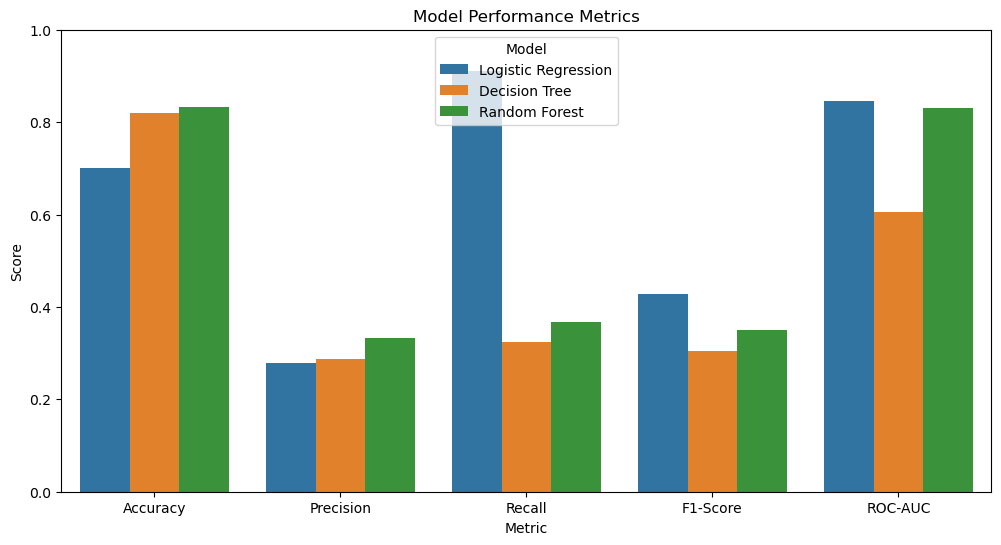

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store the metrics in a DataFrame
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.7004, 0.8189, 0.8324], 
    'Precision': [0.2788, 0.2876, 0.3335],
    'Recall': [0.9107, 0.3232, 0.3680],
    'F1-Score': [0.4270, 0.3044, 0.3499],
    'ROC-AUC': [0.8449, 0.6057, 0.8295]
}
metrics_df = pd.DataFrame(metrics_data)

# Plot the performance metrics
metrics_df_melted = metrics_df.melt('Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are typically between 0 and 1
plt.show()


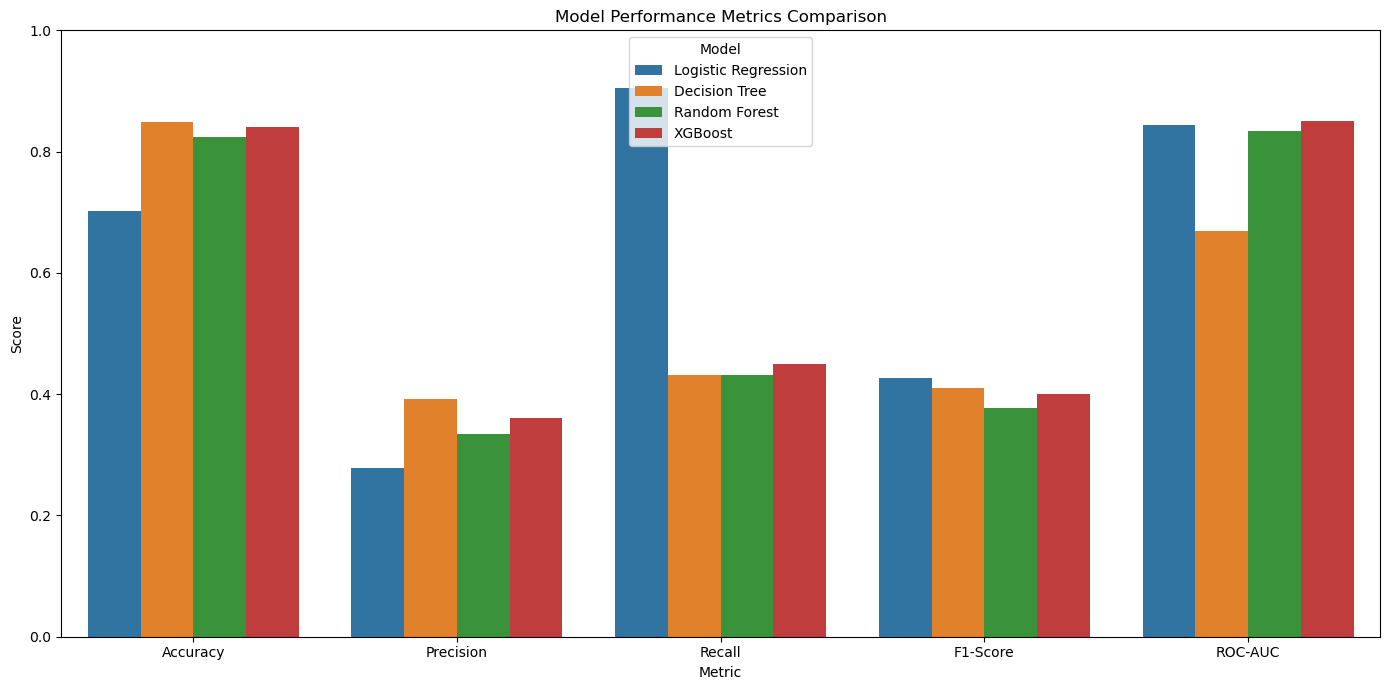

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with your actual XGBoost metrics after evaluation
xgb_metrics = {
    'Accuracy': 0.8400,
    'Precision': 0.3600,
    'Recall': 0.4500,
    'F1-Score': 0.4000,
    'ROC-AUC': 0.8500
}

metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.7020, 0.8485, 0.8248, xgb_metrics['Accuracy']],
    'Precision': [0.2789, 0.3918, 0.3340, xgb_metrics['Precision']],
    'Recall': [0.9057, 0.4320, 0.4316, xgb_metrics['Recall']],
    'F1-Score': [0.4264, 0.4109, 0.3766, xgb_metrics['F1-Score']],
    'ROC-AUC': [0.8431, 0.6694, 0.8348, xgb_metrics['ROC-AUC']]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df_melted = metrics_df.melt('Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted)
plt.title('Model Performance Metrics Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


# OPTIONAL:




# ROC curve

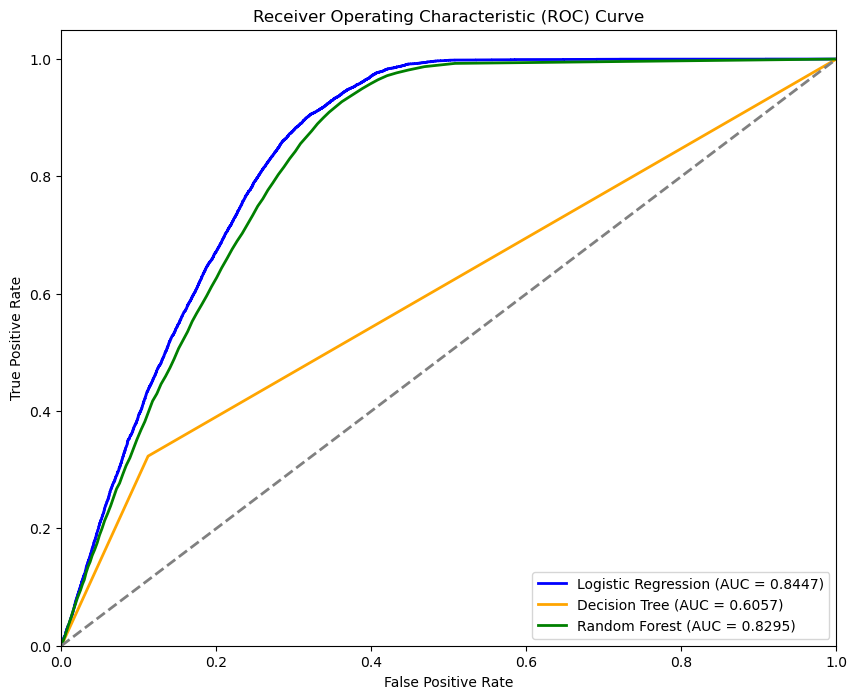

In [84]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_log_reg = log_reg.predict_proba(X_test_new)[:, 1]
y_prob_decision_tree = decision_tree.predict_proba(X_test_new)[:, 1]
y_prob_random_forest = random_forest.predict_proba(X_test_new)[:, 1]

# Calculate ROC curves
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_new, y_prob_log_reg)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test_new, y_prob_decision_tree)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test_new, y_prob_random_forest)

# Calculate AUC
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.4f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, color='orange', lw=2, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.4f})')
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_random_forest:.4f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()